# Experiment: Water Management Strategies: Irrigation

One of the possibilities that countries which face high water stress could have to reduce their stress, is to irrigate their crops with treated municipal water or even untreated municipal water.

To test this, we define our Null-Hypothesis $H_0$ that there is no difference between the water source that is used for irrigation in countries with high water stress.

The test we use is a chi-square independence test.

In [6]:
from tueplots import bundles, figsizes
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(1, os.path.abspath(os.getcwd()[:-3]))

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update(bundles.icml2022(column="half"))
plt.rcParams.update({"figure.dpi": 200})

In [7]:
from src.aquastat_utils import get_aquastat


# Get the aquastat data
aquastat_df = get_aquastat()

Getting AQUASTAT dataframe from fao_aquastat.csv ...
/Users/josef/Sync/Dokumente/SCHULE/Master/UT/Vorlesungen/Sem2/Data_Literacy/Paper/src/../dat/fao_aquastat.csv already exists.
Renaming countries ...


In [8]:
'''Prepare the data'''
water_stress_variable = 'SDG 6.4.2. Water Stress'
fresh_water_irrigation_variable = 'Agricultural water withdrawal'
non_treated_water_irrigation_variable = 'Direct use of not treated municipal wastewater for irrigation purposes'
treated_water_irrigation_variable = 'Direct use of treated municipal wastewater for irrigation purposes'

# Include irrigation water requirement in the DataFrame
irrigation_df = aquastat_df[
    ['Country', water_stress_variable, treated_water_irrigation_variable, non_treated_water_irrigation_variable,
     fresh_water_irrigation_variable]]

# Rename columns for clarity
irrigation_df = irrigation_df.rename(columns={non_treated_water_irrigation_variable: 'Non-treated municipal water',
                                              treated_water_irrigation_variable: 'Treated municipal water',
                                              fresh_water_irrigation_variable: 'Fresh water',
                                              water_stress_variable: 'Water Stress'})


irrigation_df

Variable,Country,Water Stress,Treated municipal water,Non-treated municipal water,Fresh water
0,Afghanistan,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN
2,Afghanistan,NaN,NaN,NaN,NaN
3,Afghanistan,NaN,NaN,NaN,NaN
4,Afghanistan,NaN,NaN,NaN,NaN
...,...,...,...,...,...
10567,Zimbabwe,31.937664,NaN,NaN,2.72100
10568,Zimbabwe,31.346226,NaN,NaN,2.77000
10569,Zimbabwe,35.405385,0.00753,NaN,3.04107
10570,Zimbabwe,35.405385,0.00753,NaN,3.04107


In [9]:
'''Create the contingency table'''
import numpy as np
import pandas as pd


MAX_BINS = 6

min_value = irrigation_df['Water Stress'].min()
max_value = irrigation_df['Water Stress'].max()
print(f'Min-Max: {min_value}-{max_value}')
irrigation_df['Water Stress'] = irrigation_df['Water Stress'].astype(
    'category')
bins = np.linspace(min_value, max_value, MAX_BINS)
labels = [label.format(bins[i], bins[i + 1])
          for i, label in enumerate(['{}-{}' for _ in range(MAX_BINS - 1)])]
irrigation_df['Water Stress'] = pd.cut(
    irrigation_df['Water Stress'], bins=bins, labels=labels)
irrigation_df['Water Stress'] = irrigation_df['Water Stress'].cat.codes

# Non-treated municipal water
min_value = irrigation_df['Non-treated municipal water'].min()
max_value = irrigation_df['Non-treated municipal water'].max()
print(f'Min-Max: {min_value}-{max_value}')
irrigation_df['Non-treated municipal water'] = irrigation_df['Non-treated municipal water'].astype(
    'category')
bins = np.linspace(min_value, max_value, MAX_BINS)
labels = [label.format(bins[i], bins[i + 1])
          for i, label in enumerate(['{}-{}' for _ in range(MAX_BINS - 1)])]
irrigation_df['Non-treated municipal water'] = pd.cut(irrigation_df['Non-treated municipal water'], bins=bins,
                                                      labels=labels)
irrigation_df['Non-treated municipal water'] = irrigation_df['Non-treated municipal water'].cat.codes


# Treated municipal water
min_value = irrigation_df['Treated municipal water'].min()
max_value = irrigation_df['Treated municipal water'].max()
print(f'Min-Max: {min_value}-{max_value}')
irrigation_df['Treated municipal water'] = irrigation_df['Treated municipal water'].astype(
    'category')
bins = np.linspace(min_value, max_value, MAX_BINS)
labels = [label.format(bins[i], bins[i + 1])
          for i, label in enumerate(['{}-{}' for _ in range(MAX_BINS - 1)])]
irrigation_df['Treated municipal water'] = pd.cut(
    irrigation_df['Treated municipal water'], bins=bins, labels=labels)
irrigation_df['Treated municipal water'] = irrigation_df['Treated municipal water'].cat.codes


# Fresh water
min_value = irrigation_df['Fresh water'].min()
max_value = irrigation_df['Fresh water'].max()
print(f'Min-Max: {min_value}-{max_value}')
irrigation_df['Fresh water'] = irrigation_df['Fresh water'].astype('category')
bins = np.linspace(min_value, max_value, MAX_BINS)
labels = [label.format(bins[i], bins[i + 1])
          for i, label in enumerate(['{}-{}' for _ in range(MAX_BINS - 1)])]
irrigation_df['Fresh water'] = pd.cut(
    irrigation_df['Fresh water'], bins=bins, labels=labels)

Min-Max: 0.0238663484-3850.5
Min-Max: 0.012-4.33
Min-Max: 0.0-1.38
Min-Max: 0.0-688.0


In [10]:
'''Chi-square independence test'''
from scipy.stats import chi2_contingency

water_stress_non_treated = irrigation_df[[
    'Water Stress', 'Non-treated municipal water']].dropna(inplace=False)
chi2, p, dof, expected = chi2_contingency(
    pd.crosstab(water_stress_non_treated['Water Stress'], water_stress_non_treated['Non-treated municipal water']))
print('Non-treated municipal water: chi2 = {}, p = {}, dof = {}, expected = {}'.format(chi2, p, dof, expected))

water_stress_treated = irrigation_df[[
    'Water Stress', 'Treated municipal water']].dropna(inplace=False)
chi2, p, dof, expected = chi2_contingency(
    pd.crosstab(water_stress_treated['Water Stress'], water_stress_treated['Treated municipal water']))
print('Treated municipal water: chi2 = {}, p = {}'.format(chi2, p))

water_stress_fresh = irrigation_df[[
    'Water Stress', 'Fresh water']].dropna(inplace=False)
chi2, p, dof, expected = chi2_contingency(pd.crosstab(
    water_stress_fresh['Water Stress'], water_stress_fresh['Fresh water']))
print('Fresh water: chi2 = {}, p = {}'.format(chi2, p))

Non-treated municipal water: chi2 = 124.4357357089385, p = 2.5970799101684114e-19, dof = 15, expected = [[4.66369221e+03 3.04173288e+01 2.72861332e+01 7.60433220e+00]
 [5.66467499e+03 3.69458948e+01 3.31426409e+01 9.23647370e+00]
 [5.52266364e+01 3.60196746e-01 3.23117669e-01 9.00491865e-02]
 [2.66271283e+01 1.73666288e-01 1.55788876e-01 4.34165721e-02]
 [6.90332955e+00 4.50245933e-02 4.03897087e-02 1.12561483e-02]
 [8.87570942e+00 5.78887628e-02 5.19296254e-02 1.44721907e-02]]
Treated municipal water: chi2 = 1591.9500379360215, p = 0.0
Fresh water: chi2 = 8.328284096883086, p = 0.9894633673080807


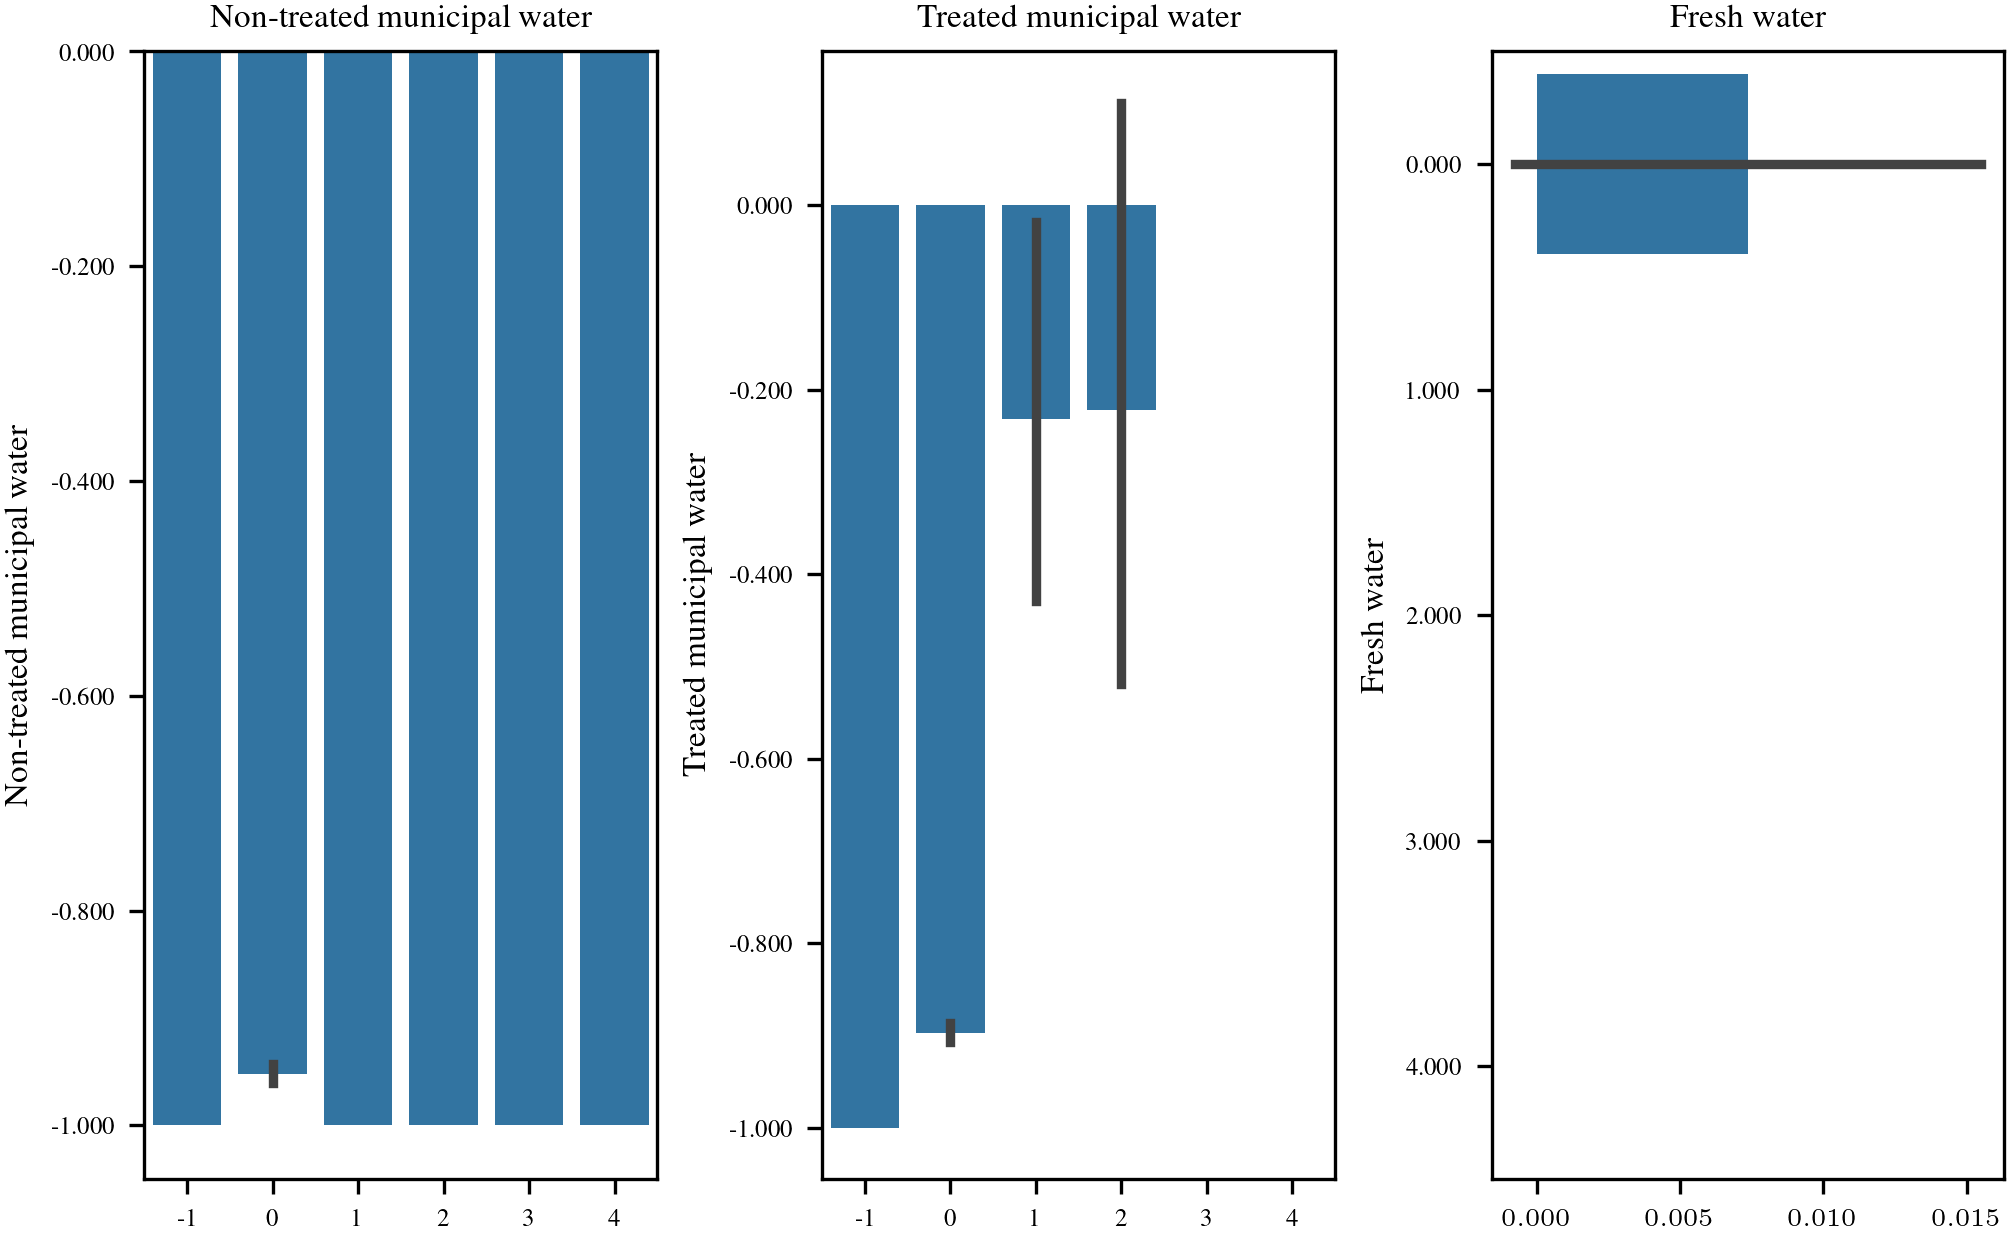

In [11]:
'''Plot the chi-square test results'''

from matplotlib.ticker import FormatStrFormatter
fig, ax = plt.subplots(1, 3)
sns.barplot(x='Water Stress', y='Non-treated municipal water',
            data=water_stress_non_treated, ax=ax[0])
sns.barplot(x='Water Stress', y='Treated municipal water',
            data=water_stress_treated, ax=ax[1])
sns.barplot(x='Water Stress', y='Fresh water',
            data=water_stress_fresh, ax=ax[2])

# Titles
ax[0].set_title('Non-treated municipal water')
ax[1].set_title('Treated municipal water')
ax[2].set_title('Fresh water')

# Format axes
ax[0].set_xlabel('')
ax[1].set_xlabel('')
ax[2].set_xlabel('')

# Format numbers on y-axis
ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax[2].yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

plt.show()